BYTEWISE MACHINE LEARNING/ DEEP LEARNING FINAL TASK BY HASHIR AZIZ

TRACK LEAD : ZAYAN RASHID RANA

PROJECT NAME : HANDWRITTEN DIGIT RECONGNITION SYSTEM USING CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


Steps:
1- Importing the mnist from tensorflow top lib Keras.datasets
2- Normalize the data for better model prediction
3- Reshaping the images to 28*28 pixels
4- Model I am are using is Sequential model (The most simplest one)
5- Adding Layers to our model and also dropping off so to reduce overfitting
6- Compiling the model, optimzer used here is Adam and learning rate is 0.1%
7- Traing the model by running 30 epochs for better accuracy
8- Evelvate the model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: ', accuracy)




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6892 - loss: 0.9183 - val_accuracy: 0.9734 - val_loss: 0.0834
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9624 - loss: 0.1464 - val_accuracy: 0.9787 - val_loss: 0.0743
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9764 - loss: 0.0949 - val_accuracy: 0.9829 - val_loss: 0.0627
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9794 - loss: 0.0805 - val_accuracy: 0.9819 - val_loss: 0.0659
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0641 - val_accuracy: 0.9862 - val_loss: 0.0565
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9868 - loss: 0.0563 - val_accuracy: 0.9886 - val_loss: 0.0494
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9886 - loss: 0.0454 - val_accuracy: 0.9868 - val_loss: 0.0580
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0389 - val_accuracy: 

I  Got a perfect Accuracy of 98%

Now plotting for better insights of training and validation accuracy

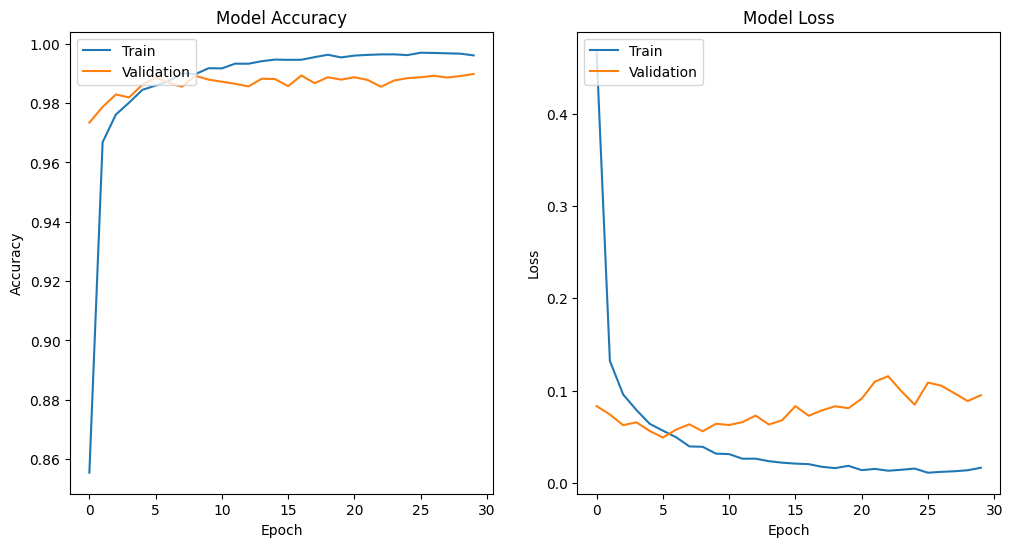

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

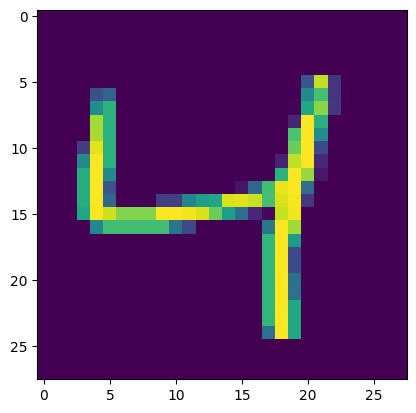

In [4]:
plt.imshow(x_train[2])

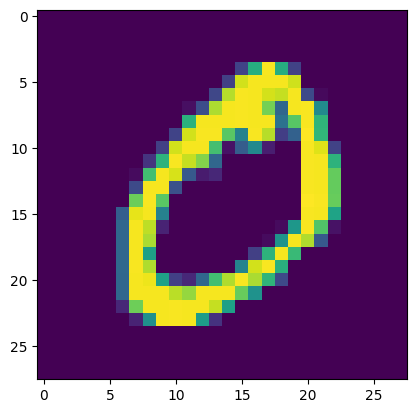

In [5]:
plt.imshow(x_train[1])

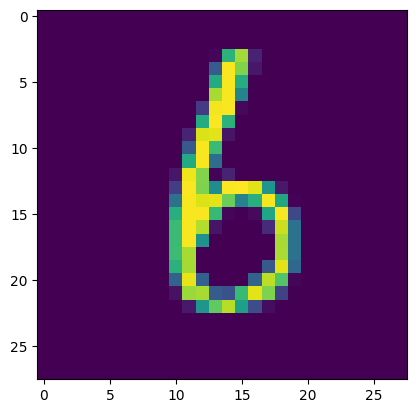

In [6]:
plt.imshow(x_train[660])

Now I am going to take any input num from the user and check my models prediction on that...

In [7]:
from sklearn.metrics import accuracy_score
import numpy as np

Enter an image index (between 0 and 9999) to predict: 98


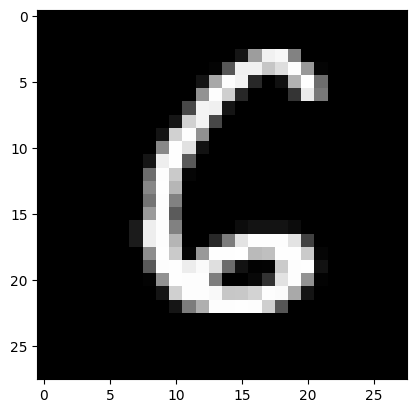

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
The predicted digit is: 6
Accuracy of the predicted input: 100.00%


In [8]:
# Function to predict user input
def predict_digit(img):
    img = img.reshape(1, 28, 28, 1)
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Get user input
user_input = input("Enter an image index (between 0 and 9999) to predict: ")
try:
    index = int(user_input)
    if index >= 0 and index < 10000:
        sample_image = x_test[index]
        sample_label = y_test[index]
        plt.imshow(sample_image.reshape(28, 28), cmap='gray')
        plt.show()
        predicted_digit = predict_digit(sample_image)
        print(f"The predicted digit is: {predicted_digit}")

        # Calculate the accuracy of the predicted input
        accuracy = accuracy_score([sample_label], [predicted_digit])
        print(f"Accuracy of the predicted input: {accuracy*100:.2f}%")
    else:
        print("Invalid index. Please enter a value between 0 and 9999.")
except ValueError:
    print("Invalid input. Please enter a number.")

You can see above i got 100% accuracy on that particular input it means that my model is trained perfectly.
Now let's try one more time...

Enter an image index (between 0 and 9999) to predict: 56


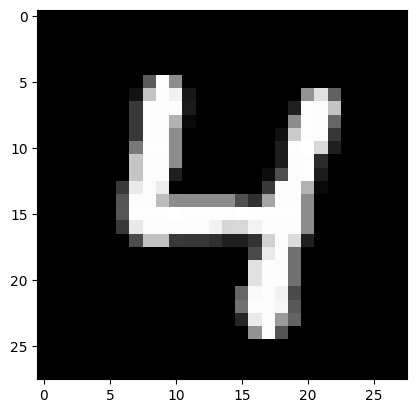

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The predicted digit is: 4
Accuracy of the predicted input: 100.00%


In [9]:
# Function to predict user input
def predict_digit(img):
    img = img.reshape(1, 28, 28, 1)
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Get user input
user_input = input("Enter an image index (between 0 and 9999) to predict: ")
try:
    index = int(user_input)
    if index >= 0 and index < 10000:
        sample_image = x_test[index]
        sample_label = y_test[index]
        plt.imshow(sample_image.reshape(28, 28), cmap='gray')
        plt.show()
        predicted_digit = predict_digit(sample_image)
        print(f"The predicted digit is: {predicted_digit}")

        # Calculate the accuracy of the predicted input
        accuracy = accuracy_score([sample_label], [predicted_digit])
        print(f"Accuracy of the predicted input: {accuracy*100:.2f}%")
    else:
        print("Invalid index. Please enter a value between 0 and 9999.")
except ValueError:
    print("Invalid input. Please enter a number.")

Enter an image index (between 0 and 9999) to predict: 4


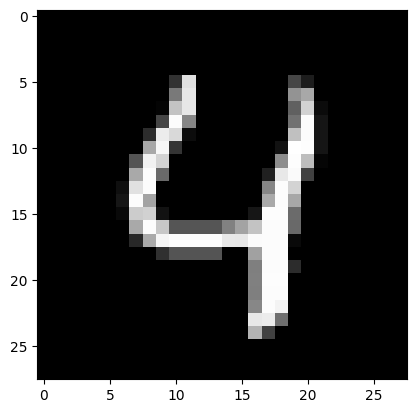

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The predicted digit is: 4
Accuracy of the predicted input: 100.00%


In [10]:
# Function to predict user input
def predict_digit(img):
    img = img.reshape(1, 28, 28, 1)
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Get user input
user_input = input("Enter an image index (between 0 and 9999) to predict: ")
try:
    index = int(user_input)
    if index >= 0 and index < 10000:
        sample_image = x_test[index]
        sample_label = y_test[index]
        plt.imshow(sample_image.reshape(28, 28), cmap='gray')
        plt.show()
        predicted_digit = predict_digit(sample_image)
        print(f"The predicted digit is: {predicted_digit}")

        # Calculate the accuracy of the predicted input
        accuracy = accuracy_score([sample_label], [predicted_digit])
        print(f"Accuracy of the predicted input: {accuracy*100:.2f}%")
    else:
        print("Invalid index. Please enter a value between 0 and 9999.")
except ValueError:
    print("Invalid input. Please enter a number.")

Enter an image index (between 0 and 9999) to predict: 6


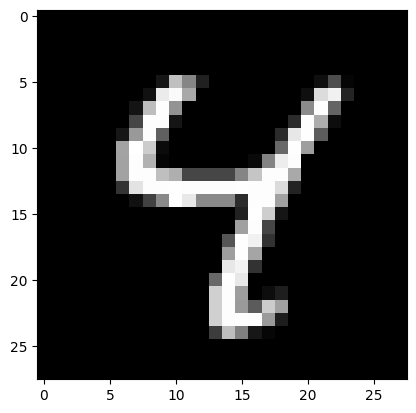

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The predicted digit is: 4
Accuracy of the predicted input: 100.00%


In [11]:
# Function to predict user input
def predict_digit(img):
    img = img.reshape(1, 28, 28, 1)
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Get user input
user_input = input("Enter an image index (between 0 and 9999) to predict: ")
try:
    index = int(user_input)
    if index >= 0 and index < 10000:
        sample_image = x_test[index]
        sample_label = y_test[index]
        plt.imshow(sample_image.reshape(28, 28), cmap='gray')
        plt.show()
        predicted_digit = predict_digit(sample_image)
        print(f"The predicted digit is: {predicted_digit}")

        # Calculate the accuracy of the predicted input
        accuracy = accuracy_score([sample_label], [predicted_digit])
        print(f"Accuracy of the predicted input: {accuracy*100:.2f}%")
    else:
        print("Invalid index. Please enter a value between 0 and 9999.")
except ValueError:
    print("Invalid input. Please enter a number.")

In [12]:
x_train[5]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

  Now lets Take an image input from the user to check model prediction

In [13]:
from tensorflow.keras.preprocessing import image

In [14]:
def preprocess_image(image_path):
    img = image.load_img(image_path, color_mode="grayscale", target_size=(28, 28))
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def predict_digit(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.axis('off')
    plt.show()
    return predicted_digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


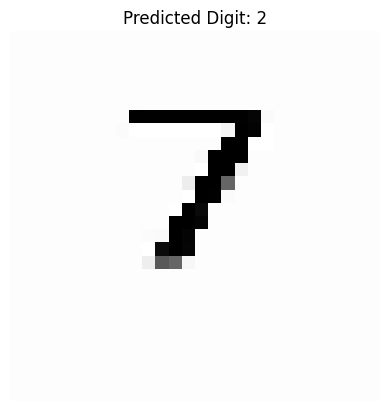

2

In [16]:
predict_digit('/content/num.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


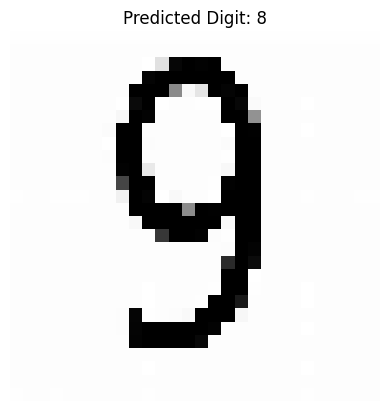

8

In [17]:
predict_digit('/content/h.png')